# **OASIS INFOBYTE TASK**

*Data Science Internship*

# **Author : ANKIT PURAKAYASTHA**

**Task 3 : Car Price Prediction With Machine Learning**

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [4]:
warnings.filterwarnings("ignore")

# Importing Data Set

In [5]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


# Loading Data

In [6]:
data = pd.read_csv('CarPrice_Assignment.csv')

# Exploring Data

In [7]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Checking Null Value

In [8]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0     False      False    False     False       False       False    False   
1     False      False    False     False       False       False    False   
2     False      False    False     False       False       False    False   
3     False      False    False     False       False       False    False   
4     False      False    False     False       False       False    False   
..      ...        ...      ...       ...         ...         ...      ...   
200   False      False    False     False       False       False    False   
201   False      False    False     False       False       False    False   
202   False      False    False     False       False       False    False   
203   False      False    False     False       False       False    False   
204   False      False    False     False       False       False    False   

 

# Dropping Null Value (If Any)

In [9]:
data = data.dropna()

# Dropping Duplicate Value(If Any)

In [10]:
data = data.drop_duplicates()

# Visualizing Data

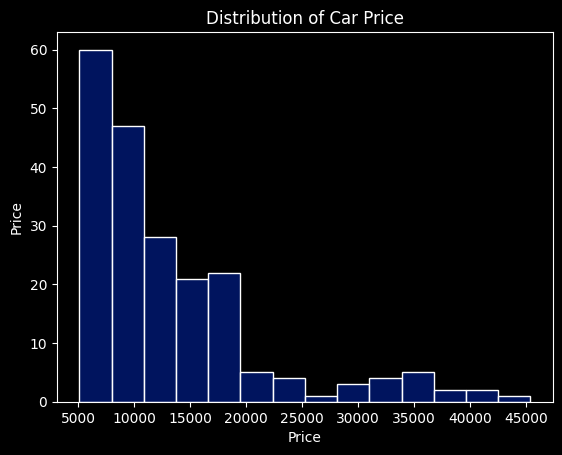

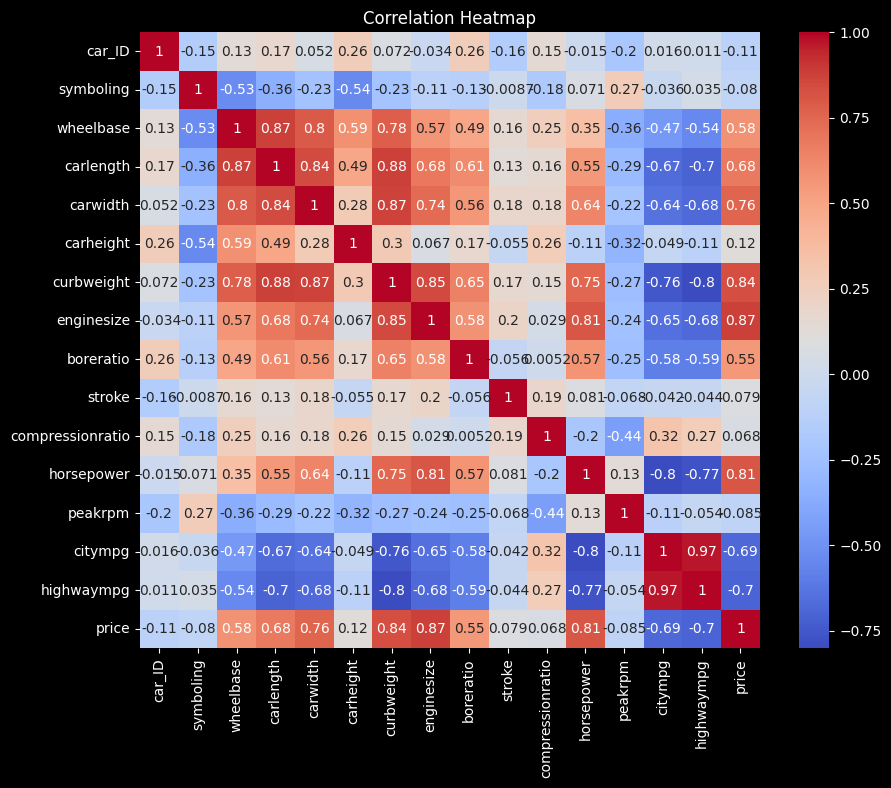

In [11]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(data['price'])
plt.title('Distribution of Car Price', color = 'white')
plt.xlabel('Price', color='white')
plt.ylabel('Price', color ='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

numeric_features = ['wheelbase', 'carlength', 'carwidth', 'carhight', 'curbweighrt',
                    'enginsize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                    'peakrmp', 'citymgp', 'highwaympg', 'price']
correlation_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.title('Correlation Heatmap', color= 'white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# Preprocessing Data

In [12]:
feature_cols  = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                 'drivewheel', 'enginelocation',  'wheelbase' ,'carlength','carwidth',
                 'carheight', 'curbweight','enginetype', 'cylindernumber', 'enginesize',
                 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                 'peakrpm','citympg', 'highwaympg']
target_col = 'price'
X = data[feature_cols]
y = data[target_col]

#Labelling

In [13]:
label_encoder = LabelEncoder()
for col in X.columns:
  if X[col].dtype == "object":
    X[col] = label_encoder.fit_transform(X[col])

#Splitting Data

In [14]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#Fitting the Model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#Evaluating The Model

In [16]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)
print("Root Mean Square Error:", rmse)

Root Mean Square Error: 3989.535026220401


#Deployment and Prediction

In [17]:
new_car_data = [[3, 'gas', 'std', 'two', 'sedan', 'fwd', 'front', 100.0, 180.0, 68.0,
                 56.0, 2500, 'ohc', 'four', 120, 'mpfi', 3.50, 2.80, 8.5, 110, 5500, 30, 38]]

new_car_df = pd.DataFrame(new_car_data, columns=feature_cols)

new_car_encoded = pd.get_dummies(new_car_df, drop_first = True)

new_car_encoded = new_car_encoded.reindex(columns = X_train.columns,fill_value=0)

predicted_price = model.predict(new_car_encoded)

print("Predicted Price:", predicted_price)

Predicted Price: [12632.09458377]
